In [1]:
import pycaret

In [2]:
from pycaret.regression import *

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 한글깨짐 해결
plt.rcParams['font.family'] ="Malgun Gothic"

In [6]:
import numpy as np 
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [7]:
data = pd.read_csv("../autoML/automldata.csv", index_col = 0 )

In [8]:
train = data[data['date'] < '2020-09-01']
test = data[data['date'] >= '2020-09-01']

In [9]:
train = train[train['품목'] == '미나리']
test = test[test['품목'] == '미나리']
cat_f = ['주산지','요일']


setting = setup( data = train ,    target = '1_week' , categorical_features = cat_f,
               ignore_features = ['2_week','4_week','month','품목'] , normalize = True , session_id = 123)

,Description,Value
0,session_id,123
1,Target,1_week
2,Original Data,"(1447, 104)"
3,Missing Values,False
4,Numeric Features,96
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1012, 118)"


In [10]:
best = compare_models(sort = 'MAE' , exclude = ['omp','ard','par','ransac','huber'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,439.8049,519566.3849,716.9037,0.6975,1.0960,0.1603,1.5780
rf,Random Forest Regressor,483.4040,605943.9668,776.0070,0.6454,1.1197,0.1777,3.0780
lightgbm,Light Gradient Boosting Machine,490.8930,638717.6822,793.6829,0.6245,1.1142,0.1779,0.5930
gbr,Gradient Boosting Regressor,498.2063,629883.3006,789.5910,0.6278,1.1010,0.1903,1.2840
llar,Lasso Least Angle Regression,536.9664,704862.5214,836.4413,0.5936,1.0995,0.2122,0.0130
knn,K Neighbors Regressor,549.5341,761078.9750,867.5692,0.5557,1.1294,0.2095,0.0660
lasso,Lasso Regression,564.7585,728237.5406,851.0462,0.5796,1.0907,0.2277,0.0270
br,Bayesian Ridge,569.2647,750120.4796,864.0991,0.5661,1.1362,0.2301,0.0300
ridge,Ridge Regression,574.3876,739352.5875,857.4686,0.5733,1.0933,0.2325,0.0110
lr,Linear Regression,582.5086,755528.7812,866.9272,0.5640,1.1031,0.2378,0.4460


### Extra Trees Regressor

In [11]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,468.3464,534089.5236,730.8143,0.7131,1.1069,0.1591
1,447.1667,548948.0453,740.9103,0.7166,1.1004,0.1499
2,433.1117,582832.1863,763.4345,0.5511,1.5313,0.1591
3,428.4461,448017.0477,669.3408,0.7788,0.8227,0.1551
4,411.0180,520513.9948,721.4666,0.7082,1.3783,0.1377
5,468.6781,616482.6278,785.1641,0.6404,1.5829,0.1776
6,496.6903,665910.3702,816.0333,0.6061,1.0814,0.1856
7,441.2671,539050.8741,734.2008,0.6823,1.3761,0.1614
8,356.3040,282061.5285,531.0947,0.8061,0.1820,0.1435
9,447.0210,457757.6508,676.5779,0.7721,0.7983,0.1744


In [12]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,515.4110,641640.3691,801.0246,0.6553,1.1219,0.1749
1,502.0589,694864.5734,833.5854,0.6412,1.1212,0.1674
2,466.0167,628315.0214,792.6632,0.5161,1.5769,0.1781
3,462.4360,550144.5173,741.7173,0.7284,0.8402,0.1679
4,464.2236,634906.5994,796.8103,0.6440,1.4012,0.1555
5,480.3903,648450.0083,805.2639,0.6217,1.6090,0.1840
6,536.8163,755856.0559,869.3998,0.5529,1.1358,0.2003
7,490.7194,652466.4358,807.7539,0.6154,1.4067,0.1922
8,390.7808,334922.0134,578.7245,0.7698,0.2002,0.1583
9,475.5225,519194.2545,720.5514,0.7415,0.8086,0.1865


In [13]:
print(tuned_model)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


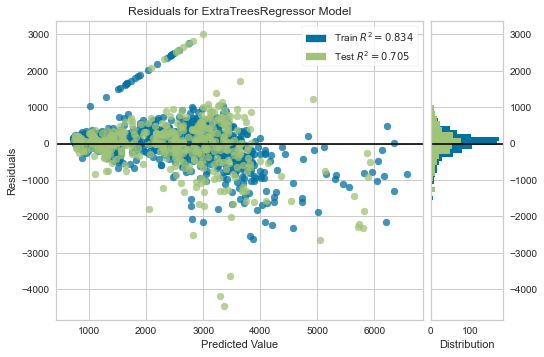

In [14]:
plot_model(tuned_model, plot = 'residuals')

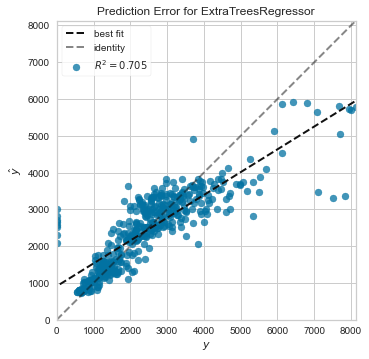

In [15]:
plot_model(tuned_model, plot = 'error')

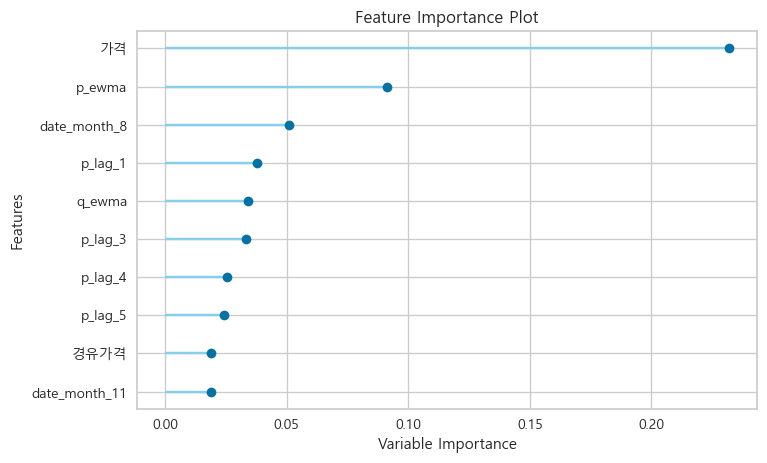

In [18]:
plot_model(tuned_model, plot = 'feature')

In [19]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,482.8425,599429.6131,774.2284,0.7052,1.0864,0.1710


,가격,거래량,경유가격,농산물,temp,max_Temp,min_Temp,wind,rain,dif_Temp,...,date_month_6,date_month_7,date_month_8,date_month_9,date_weekday_2,date_weekday_3,date_is_month_end_1,date_is_month_start_0,1_week,Label
0,3.023568,0.222593,-0.838689,0.375199,0.938185,0.894325,1.063456,-0.445602,-0.239980,-0.641716,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1822.0,3220.035207
1,0.775611,-1.254372,1.371402,1.715403,1.609448,1.553294,1.597420,0.104336,-0.062292,-0.317726,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3698.0,4923.569685
2,-0.961978,0.329054,1.114662,0.239465,0.354881,0.432132,0.198521,0.984236,-0.239980,0.696504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,966.0,1070.260068
3,0.213816,0.956134,0.912807,-0.215177,-0.635811,-0.469374,-0.714956,-0.225627,0.944606,0.837369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4673.0,3366.089858
4,-0.379925,2.253542,0.099930,0.663798,-0.788581,-0.757673,-0.909125,1.094224,-0.239980,0.569725,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2212.0,1870.199536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,-0.593422,-0.291464,-0.862948,0.375199,0.822450,0.935511,0.851635,-0.555589,-0.239980,0.161216,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2007.0,2316.432920
431,0.312773,-1.996449,-1.988564,-0.273160,-0.820987,-0.959025,-0.838518,0.544286,-0.239980,-0.275467,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2779.0,3021.682692
432,-1.060156,0.369185,-0.207654,-0.914930,0.544686,0.743312,0.260302,0.324311,-0.239980,1.457176,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,764.0,1017.598743
433,0.614319,0.559471,-0.678783,-1.054617,-1.297815,-1.384609,-1.125359,1.314199,-0.239980,-0.669889,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3176.0,3342.529976


In [20]:
final_ml = finalize_model(tuned_model)
print(final_ml)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [21]:
unseen_pred = predict_model(final_ml, data = test)
unseen_pred.head()

,date,요일,품목,가격,거래량,주산지,경유가격,농산물,temp,max_Temp,...,w_lag_2m,w_lead_1,w_lead_2,w_lead_3,w_lead_4,p_lead_1,p_lead_2,p_lead_3,p_lead_4,Label
15569,2020-09-01,화요일,미나리,3509.0,43366.5,경기,1169.45,139.93,25.70,30.50,...,0.65,1.40,0.40,0.1,0.3,41543.7,0.0,39429.4,38199.1,3119.206053
15570,2020-09-02,수요일,미나리,3292.0,42181.5,경기,1168.91,139.93,23.95,25.50,...,0.35,1.10,1.40,0.4,0.1,45953.5,41543.7,0.0,39429.4,3539.026925
15571,2020-09-03,목요일,미나리,2737.0,41860.7,경기,1168.54,139.93,22.50,25.90,...,0.35,0.20,1.10,1.4,0.4,39466.0,45953.5,41543.7,0.0,2981.813604
15572,2020-09-04,금요일,미나리,2881.0,38199.1,경기,1168.21,139.93,22.05,27.70,...,0.95,0.15,0.20,1.1,1.4,38718.9,39466.0,45953.5,41543.7,2708.437958
15573,2020-09-05,토요일,미나리,3856.0,39429.4,경기,1167.69,139.93,21.70,28.35,...,0.60,0.40,0.15,0.2,1.1,41347.0,38718.9,39466.0,45953.5,2956.205288


In [22]:
pred = unseen_pred[['date','1_week','Label']]
pred_0 = pred[pred['1_week'] > 0 ]

In [23]:
score = np.absolute(np.subtract(pred_0['1_week'], pred_0['Label']))/ pred_0['1_week']
score.mean()

0.29298520670459804

<AxesSubplot:xlabel='date', ylabel='1_week'>

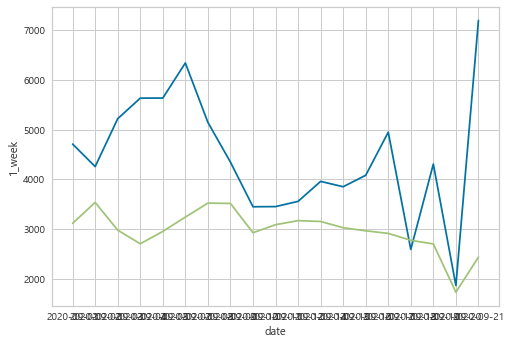

In [24]:
sns.lineplot(x= 'date', y= '1_week', data = pred_0)
sns.lineplot(x= 'date',y = 'Label', data = pred_0)